In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def ShowLabels(ax):
    for data in ax.containers: ax.bar_label(data)

In [4]:
sale=pd.read_excel(r"C:\Users\1sach\OneDrive\Desktop\Afame Technologies\SALES DATA ANALYSIS\ECOMM DATA.xlsx")

#### Checking Data For Cleaning

In [5]:
sale.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [6]:
pd.set_option('display.max_columns',None)

In [7]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
sale.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
#Postal code having very high null values

In [9]:
sale=sale.drop(['Postal Code','Row ID','Order ID'],axis=1) #droping the postal code column
                                    #as it has high null values and other less relevant columns to our analysis

In [10]:
sale.columns


Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [11]:
sale.columns=['order_date','ship_date','ship_mode','customer_id','customer_name','segment','city','state','country','market','region','product_id','category','sub-category','product_name','sales','quantity','discount','profit','shipping_cost','order_priority']

In [12]:
sale[['sales','quantity','discount','profit','shipping_cost']].describe()

,sales,quantity,discount,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375818
std,487.565361,2.278766,0.212280,174.340972,57.296810
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [13]:
sale['sales']=sale['sales'].astype(int)


In [14]:
sale.select_dtypes(include='object').columns

Index(['ship_mode', 'customer_id', 'customer_name', 'segment', 'city', 'state',
       'country', 'market', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'order_priority'],
      dtype='object')

In [15]:
cat_cols=['ship_mode','customer_id','segment','city','state','country','market','region','product_id','category','sub_category','product_name','order_priority']

In [16]:
num_cols=['sales','quantity','discount','profit','shipping_cost']

# Exploratory Data Analysis

## 1) Sales by Category

In [207]:
sale['category'].values

array(['Technology', 'Furniture', 'Technology', ..., 'Office Supplies',
       'Office Supplies', 'Office Supplies'], dtype=object)

In [109]:
most_sold_cat= sale.groupby(['category'],as_index=False)['sales'].sum()

In [110]:
most_sold_cat.sort_values(by='sales', ascending=False, inplace=True)
most_sold_cat.reset_index(drop=True, inplace=True)

In [111]:
most_sold_cat['sales'] = most_sold_cat['sales'].map('{:.2f}'.format)


In [112]:
most_sold_cat

,category,sales
0,Technology,4739096.00
1,Furniture,4105877.00
2,Office Supplies,3771073.00


In [113]:
most_sold_cat.dtypes

category    object
sales       object
dtype: object

In [114]:
most_sold_cat['category']=most_sold_cat['category'].astype('category')
most_sold_cat['sales']=pd.to_numeric(most_sold_cat['sales'])

In [129]:
most_quant_cat=sale.groupby(['category'],as_index=False)['quantity'].sum()
most_quant_cat.sort_values(by='quantity',ascending=False,inplace=True)

In [127]:
most_quant_cat.reset_index(drop=True,inplace=True)

In [128]:
most_quant_cat

,category,quantity
0,Office Supplies,108182
1,Technology,35176
2,Furniture,34954


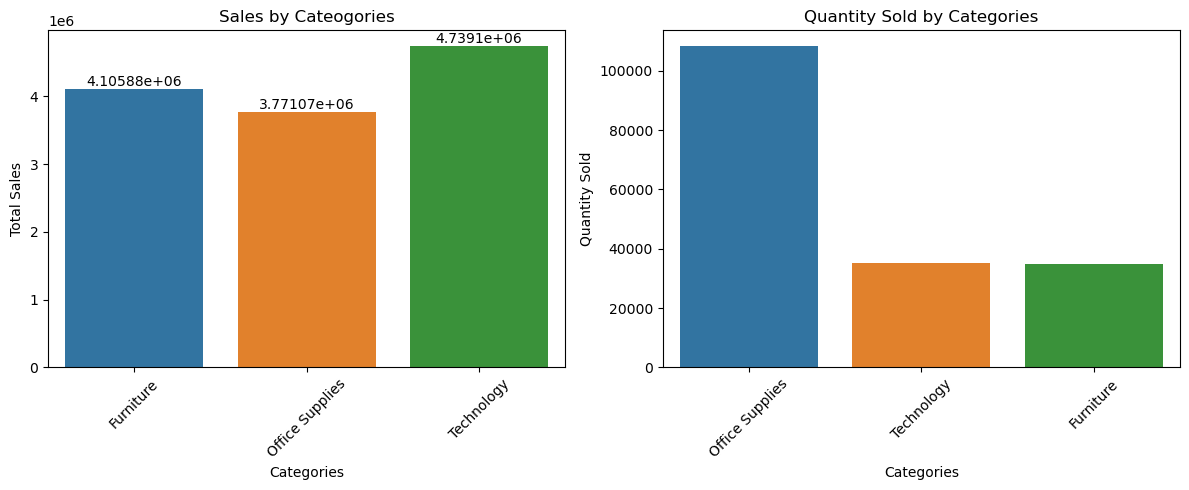

In [132]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax=sns.barplot(most_sold_cat,x='category',y='sales')
plt.title('Sales by Cateogories')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
ShowLabels(ax)


plt.subplot(1,2,2)
ax1=sns.barplot(most_quant_cat,x='category',y='quantity')
plt.title('Quantity Sold by Categories')
plt.xlabel('Categories')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Outcomes:-
#### Sales Amount
* There are mainly 3 categories of sales,
* Top sales is done through technology category
* Followed by furnitures and then slightly lower, office supplies 

#### Quantities Sold
* Top sold quantities are from Office Supplies
* Followed by Technology & Furniture which are equivalent


## 2) Quantity by Sub-categories

In [135]:
quan_sub=sale.groupby(['sub-category'],as_index=False)['quantity'].sum()

In [138]:
quan_sub.sort_values(by='quantity',ascending=False,inplace=True)

In [139]:
quan_sub.reset_index(drop=True,inplace=True)

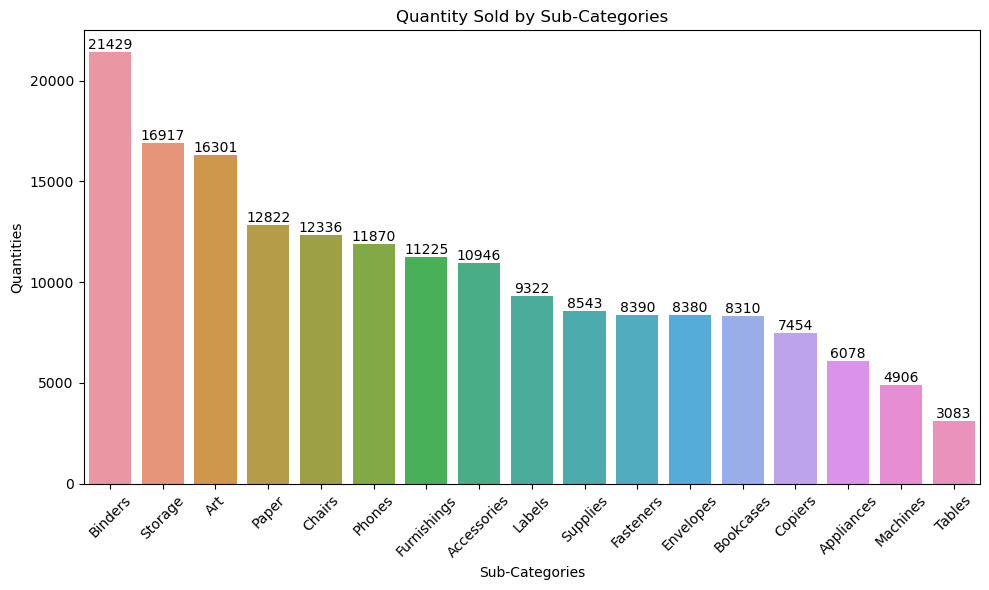

In [148]:
plt.figure(figsize=(10,6))
ax=sns.barplot(quan_sub,x='sub-category',y='quantity')
plt.title('Quantity Sold by Sub-Categories')
plt.xlabel('Sub-Categories')
plt.ylabel('Quantities')
plt.xticks(rotation=45)
ShowLabels(ax)
plt.tight_layout()
plt.show()

### Outcome :-
#### Top 5 selling sub-categories quantities are:-
* Binders-21429
* Storage-16917
* Art-16301
* Paper-12822
* Chairs-12336


In [161]:
cat_cols

['ship_mode',
 'customer_id',
 'segment',
 'city',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'order_priority']

## 3) State-Wise Sales 

In [34]:
state_sale=sale.groupby(['state'],as_index=False)['sales'].sum()

In [35]:
state_sale.sort_values(by='sales',ascending=False,inplace=True)

* As there are so many states, we will analyse only top 5 most demanding & least 5 demanding sales-wise states.

In [36]:
#Top 5
top_state_sale=state_sale.head()

In [37]:
#Least 5 
least_state_sale=(state_sale.tail()).sort_values(by='sales')

In [38]:
top_state_sale.reset_index(drop=True,inplace=True)

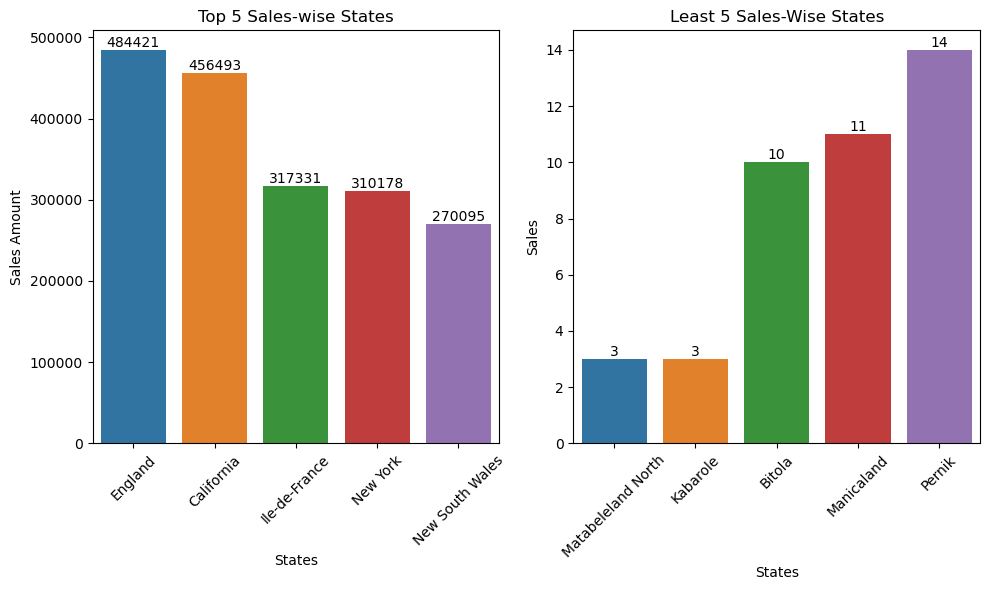

In [39]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ax=sns.barplot(top_state_sale,x='state',y='sales')
plt.title('Top 5 Sales-wise States')
plt.xlabel('States')
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
ShowLabels(ax)

plt.subplot(1,2,2)
ax1=sns.barplot(least_state_sale,x='state',y='sales')
plt.title('Least 5 Sales-Wise States')
plt.xlabel('States')
plt.xticks(rotation=45)
plt.ylabel('Sales')
ShowLabels(ax1)
plt.tight_layout()
plt.show()

### Outcomes :-
#### Top 5 Selling States:-               

* England
* California
* Ile-de-France
* New York
* New South Wales

#### Least 5 Selling States:
* Pernik 
* Manicaland 
* Bitola 
* Matabeleland North 
* Kabarole

## 4) State-Wise Sub-Categories Demand Analysis

In [82]:
state_sub=sale.groupby(['state'],as_index=False)['sub-category'].count()

In [83]:
state_sub.sort_values(by='sub-category',ascending=False,inplace=True)

In [84]:
state_sub.reset_index(drop=True,inplace=True)

In [85]:
top_state_sub=state_sub.head(5)

In [86]:
least_state_sub=(state_sub.tail(5)).sort_values(by='sub-category',ascending=True)

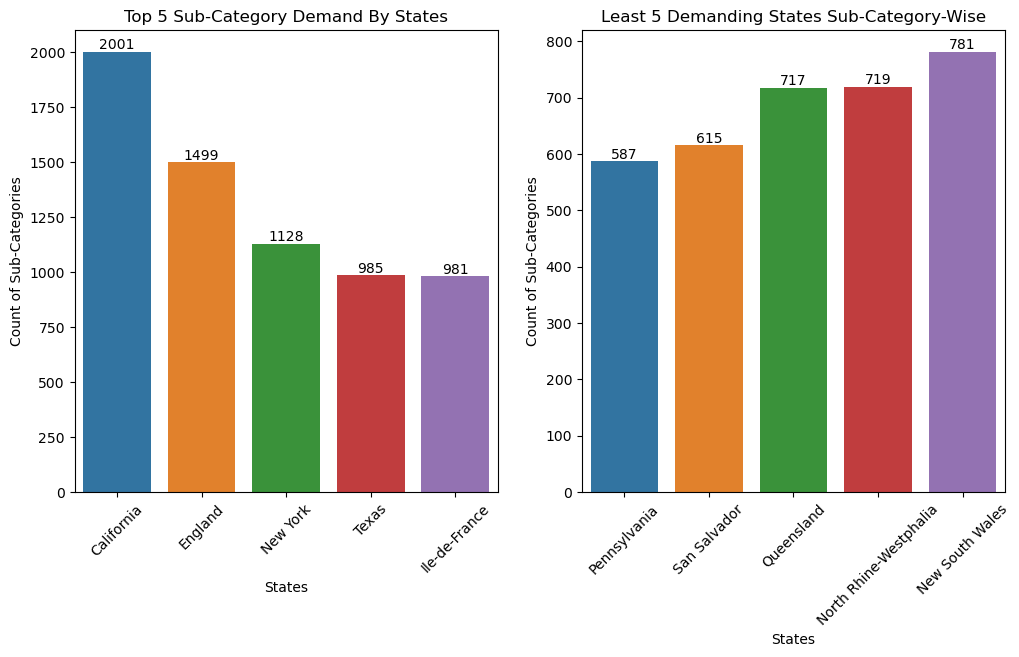

In [245]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax=sns.barplot(top_state_sub,x='state',y='sub-category')
plt.title('Top 5 Sub-Category Demand By States')
plt.xlabel('States')
plt.ylabel('Count of Sub-Categories')
plt.xticks(rotation=45)
ShowLabels(ax)

plt.subplot(1,2,2)
ax1=sns.barplot(least_state_sub,x='state',y='sub-category')
plt.title('Least 5 Demanding States Sub-Category-Wise')
plt.xlabel('States')
plt.xticks(rotation=45)
plt.ylabel('Count of Sub-Categories')
ShowLabels(ax1)
plt.show()

### Outcomes :-
#### Top 5 Demanding States in terms of Sub-Category:-

* California
* England
* New York
* Texas
* Ile-de-France

#### Least 5 Demanding States in terms of Sub-Category

* Pennsylvania
* San Salvador 
* Queensland 
* North Rhine-Westphalia 
* New South Wales



## 5) State-wise Profitablity Analysis

In [259]:
state_profit=sale.groupby(['state'],as_index=False)['profit'].sum()

In [261]:
state_profit.sort_values(by='profit',ascending=False,inplace=True)

In [272]:
state_profit.reset_index(drop=True,inplace=True)

In [281]:
top_state_profit=state_profit.head(10)

In [286]:
least_state_profit=(state_profit.tail(10)).sort_values(by='profit',ascending=True)

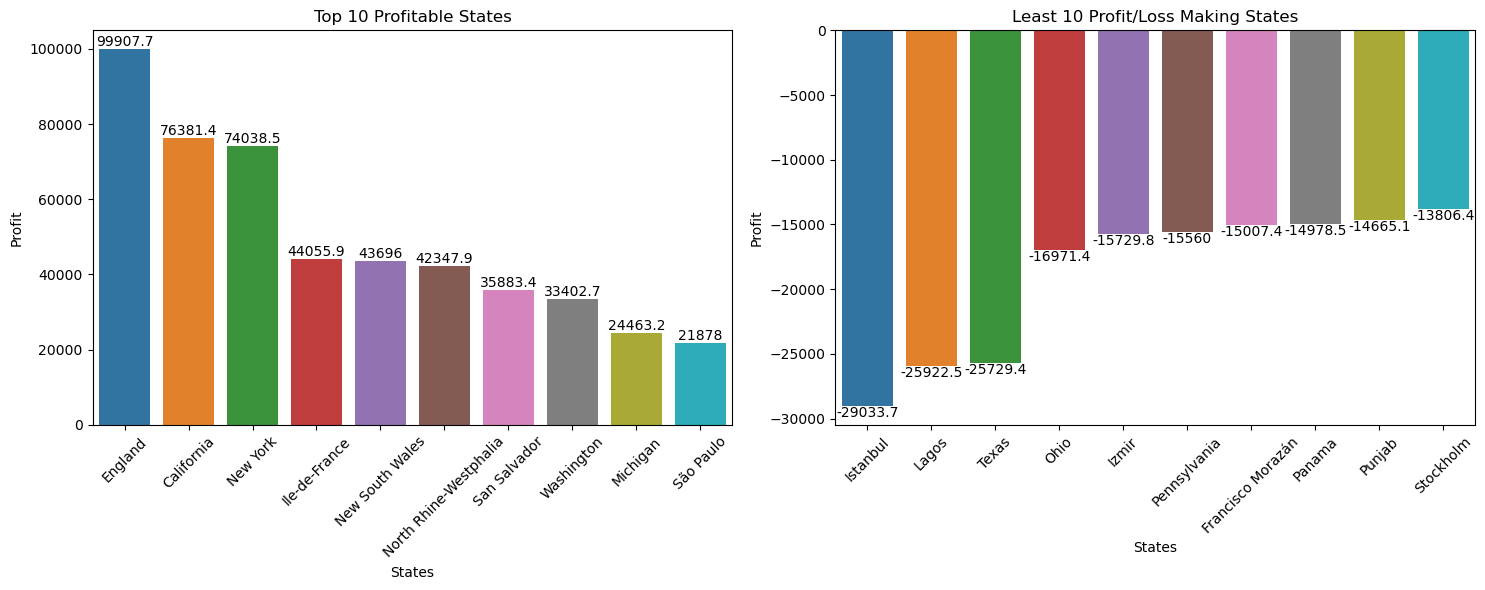

In [288]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.barplot(top_state_profit,x='state',y='profit')
plt.title('Top 10 Profitable States')
plt.xlabel('States')
plt.ylabel('Profit')
plt.xticks(rotation=45)
ShowLabels(ax)

plt.subplot(1,2,2)
ax1=sns.barplot(least_state_profit,x='state',y='profit')
plt.title('Least 10 Profit/Loss Making States')
plt.xlabel('States')
plt.ylabel('Profit')
plt.xticks(rotation=45)
ShowLabels(ax1)

plt.tight_layout()
plt.show()

### Outcomes :-
#### Top 5 Highest Profitable States:-

* England
* California
* New York
* Ile-de-France
* New South Wales

#### Top 5 Loss Making States

* Istandbul
* Lagos
* Texas
* Ohio
* Izmir

#### Obervation-
Texas is top 4th sub-category demanding state as explored earlier, yet it on 3rd among most loss making states.

In [293]:
cat_cols

['ship_mode',
 'customer_id',
 'segment',
 'city',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'order_priority']

In [294]:
num_cols

['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

 ## 6) Sales & Profitablity Over the Years Analysis

In [304]:
yearly_sales=sale.groupby(sale['order_date'].dt.year)['sales'].sum()


In [305]:
yearly_sales

order_date
2011    2.259451e+06
2012    2.677439e+06
2013    3.405746e+06
2014    4.299866e+06
Name: sales, dtype: float64

In [302]:
yearly_profit=sale.groupby(sale['order_date'].dt.year)['profit'].sum()

In [303]:
yearly_profit

order_date
2011    248940.81154
2012    307415.27910
2013    406935.23018
2014    504165.97046
Name: profit, dtype: float64

In [306]:
#Calculating the increase in sale & profit by year by year


In [307]:
sale_increase=yearly_sales.diff()

In [309]:
sale_increase=sale_increase.fillna(0)

In [310]:
sale_increase

order_date
2011         0.00000
2012    417987.79886
2013    728307.75498
2014    894119.42118
Name: sales, dtype: float64

In [311]:
profit_increase=yearly_profit.diff()
profit_increase=profit_increase.fillna(0)
profit_increase

order_date
2011        0.00000
2012    58474.46756
2013    99519.95108
2014    97230.74028
Name: profit, dtype: float64

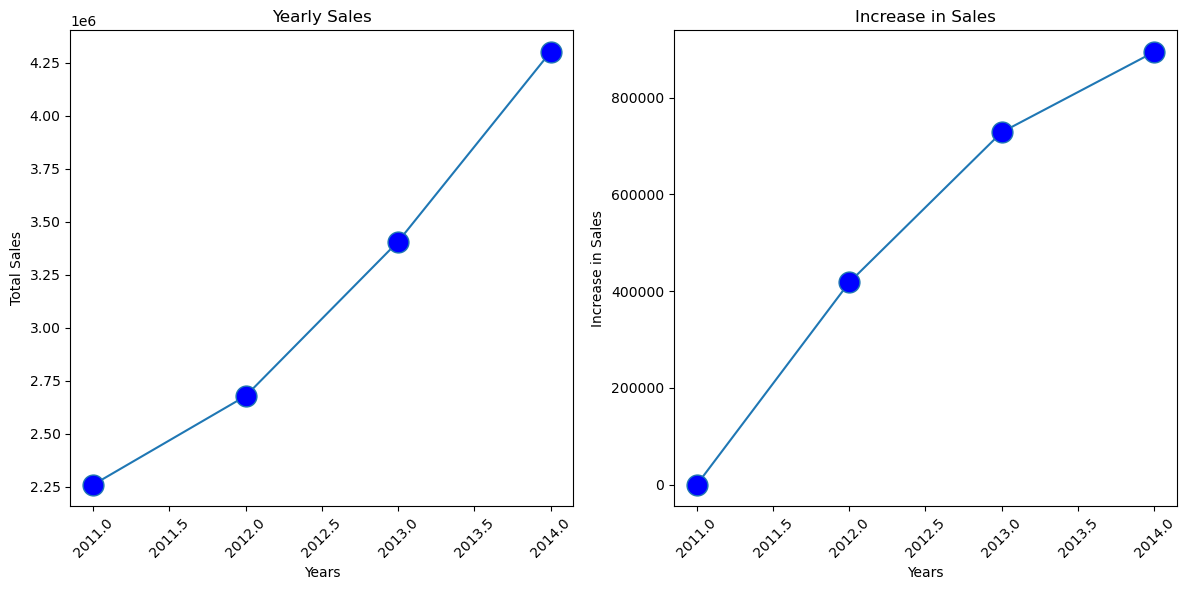

In [351]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
line=plt.plot(yearly_sales.index,yearly_sales.values, marker='o',ms=15,mfc='b')
plt.title('Sales Over the Years')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')

plt.subplot(1,2,2)
line2=plt.plot(sale_increase.index,sale_increase.values,marker='o',ms=15,mfc='b')
plt.title('Increase in Sales')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Increase in Sales')
plt.tight_layout()
plt.show()

### Observations:-

* The total sales over time line shows that the sales is increasing almost equally overtime.
* The increase in the sales as per previous year was **higher from 2011 to 2012.**
* After 2012, it is showing a gradual increase but not bigger, it might be due to market saturation or other factors.

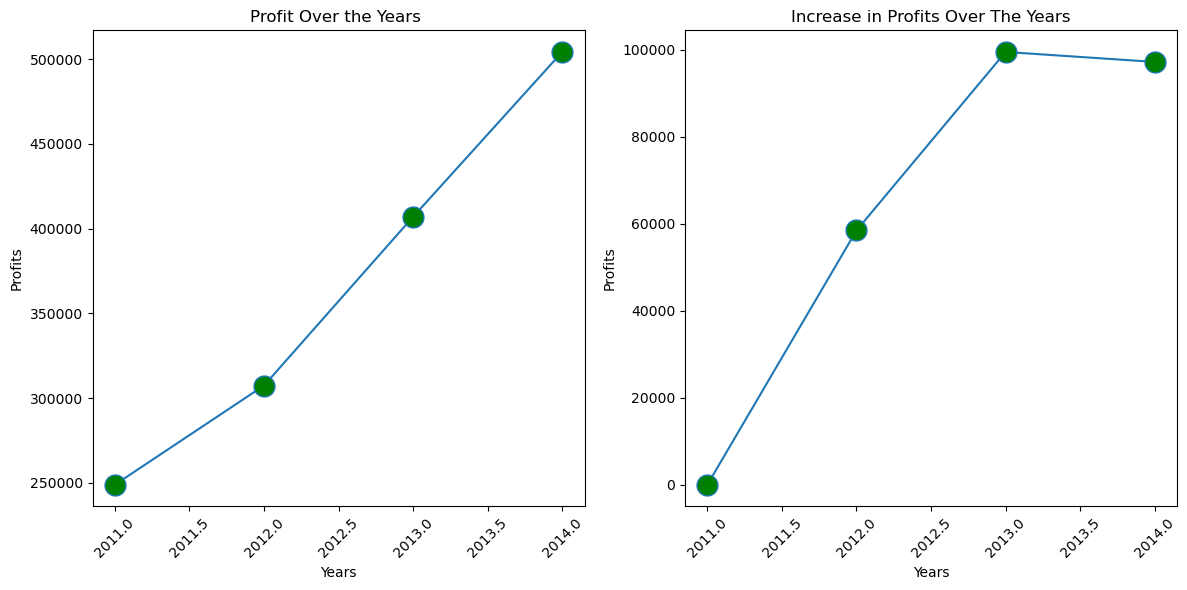

In [355]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(yearly_profit.index,yearly_profit.values,marker='o',ms=15,mfc='g')
plt.title('Profit Over the Years ')
plt.xlabel('Years')
plt.xticks(rotation=45),
plt.ylabel('Profits')

plt.subplot(1,2,2)
plt.plot(profit_increase.index,profit_increase.values,marker='o',ms=15,mfc='g')
plt.title('Increase in Profits Over The Years')
plt.xlabel("Years")
plt.ylabel("Profits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations:-
* Similar results are shown here
* The total profit over time line shows that the profit is increasing almost equally overtime.
* The increase in the profit as per previous year was **higher from 2011 to 2012.**
* After 2012, it is showing a gradual increase between 2012-2013 and in 2013-2014 the increase is getting lesser than previous year

## 7)Quarterly Profit Analysis

In [66]:
sale['quarter']=sale['order_date'].dt.to_period('Q')

In [27]:
sale['quarter'].unique()

<PeriodArray>
['2012Q3', '2013Q1', '2013Q4', '2013Q2', '2011Q4', '2012Q2', '2014Q4',
 '2012Q1', '2011Q2', '2012Q4', '2014Q3', '2014Q1', '2011Q1', '2011Q3',
 '2013Q3', '2014Q2']
Length: 16, dtype: period[Q-DEC]

In [30]:
quarterly_profit=sale.groupby(['quarter'], as_index=False)['profit'].sum()

In [59]:
quarterly_profit.sort_values(by='quarter',ascending=True,inplace=True)

In [60]:
quarterly_profit.reset_index(drop=True,inplace=True)

In [61]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

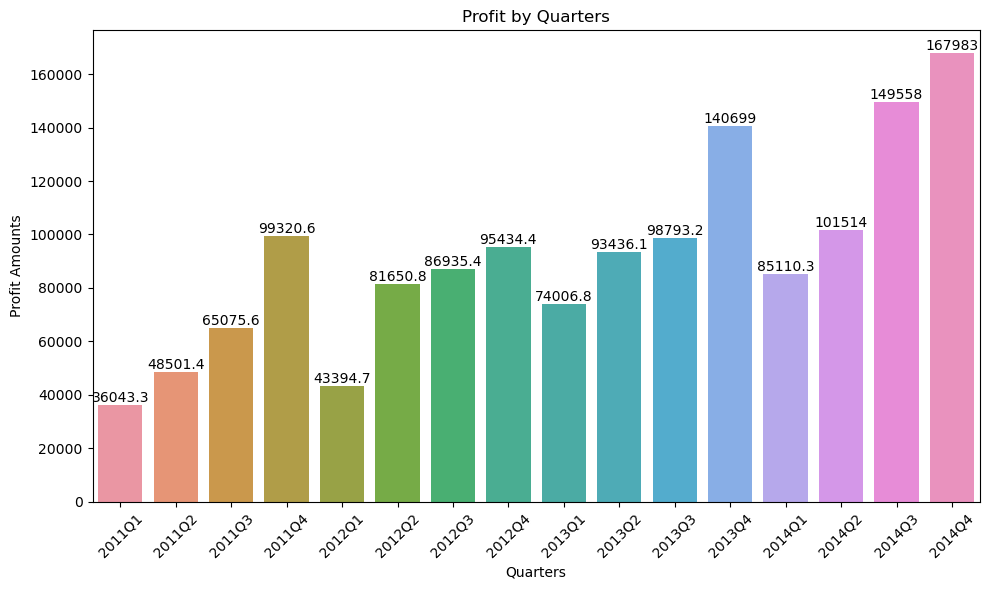

In [63]:
plt.figure(figsize=(10,6))
ax=sns.barplot(quarterly_profit,x='quarter',y='profit')
plt.title('Profit by Quarters')
plt.xlabel('Quarters')
plt.ylabel('Profit Amounts')
plt.xticks(rotation=45)
plt.tight_layout()
ShowLabels(ax)
plt.show()

### Outcomes

* The Quarter 4 of 2014 is the **most profitable quarter** whereas the **least profitable quarter is Q1 of 2011**.

## 8) Quarterly Sales Analysis

In [81]:
qrt_sales=sale.groupby(['quarter'],as_index=False)['sales'].sum()

In [83]:
qrt_sales.sort_values(by='quarter',ascending=True,inplace=True)

In [85]:
qrt_sales.reset_index(drop=True,inplace=True)

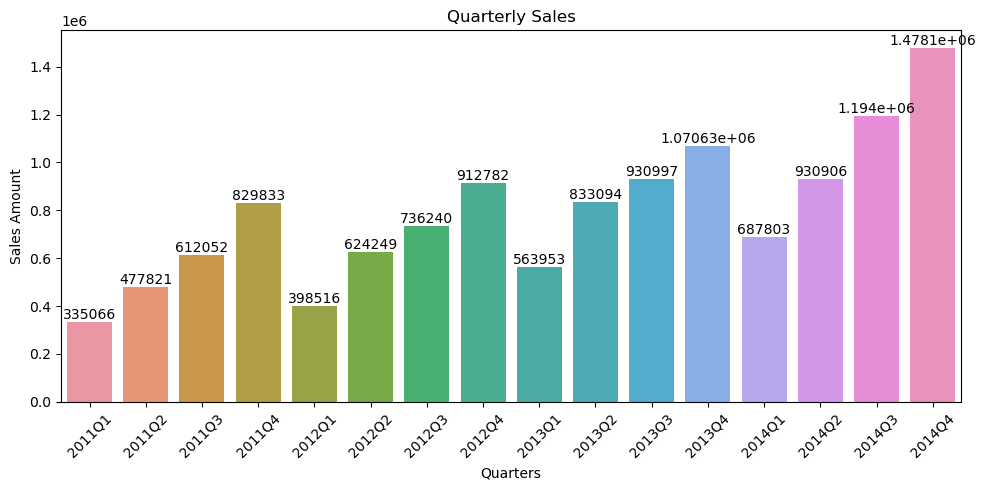

In [90]:
plt.figure(figsize=(10,5))
ax=sns.barplot(qrt_sales,x='quarter',y='sales')
plt.title('Quarterly Sales')
plt.xlabel('Quarters')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
ShowLabels(ax)
plt.tight_layout()
plt.show()

### Outcomes

* The Quarter 4 of 2014 has the **most Sales** whereas the **least sales quarter is Q1 of 2011**.
* Both, Sales & profit has a pattern of increasing nature in every quarter of the year.

## 9)Shipping Delay Analysis of States

In [18]:
sale['delay']= (sale['ship_date'] - sale['order_date']).dt.days

In [19]:
state_delay=sale.groupby(['state'],as_index=False)['delay'].mean()

In [20]:
state_delay=state_delay.round()

In [21]:
state_delay.sort_values(by='delay',ascending=False,inplace=True)

In [22]:
state_delay.reset_index(drop=True,inplace=True)

In [23]:
most_state_delay=state_delay.head(20)

In [31]:
least_state_delay=state_delay.tail(20)

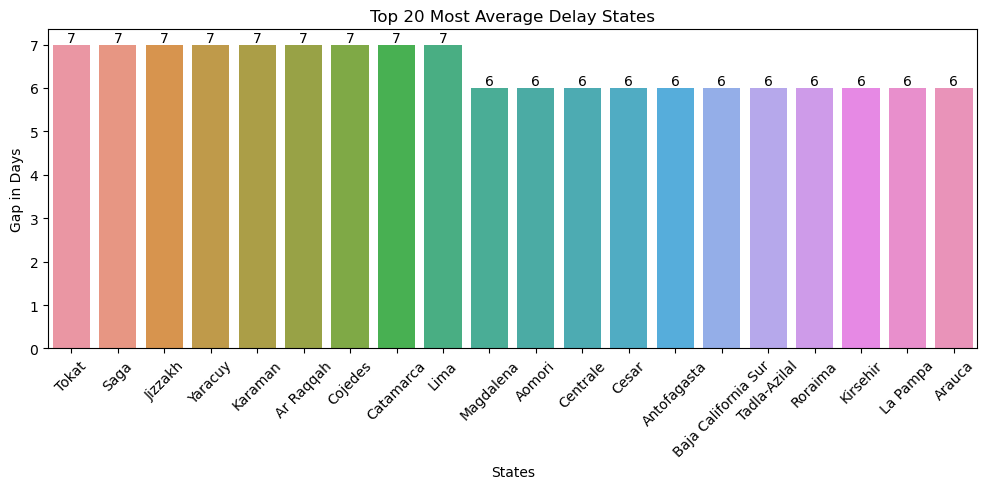

In [25]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=most_state_delay,x='state',y='delay')
plt.title('Top 20 Most Average Delay States')
plt.xlabel('States')
plt.ylabel('Gap in Days')
plt.xticks(rotation=45)
plt.tight_layout()
ShowLabels(ax)
plt.show()

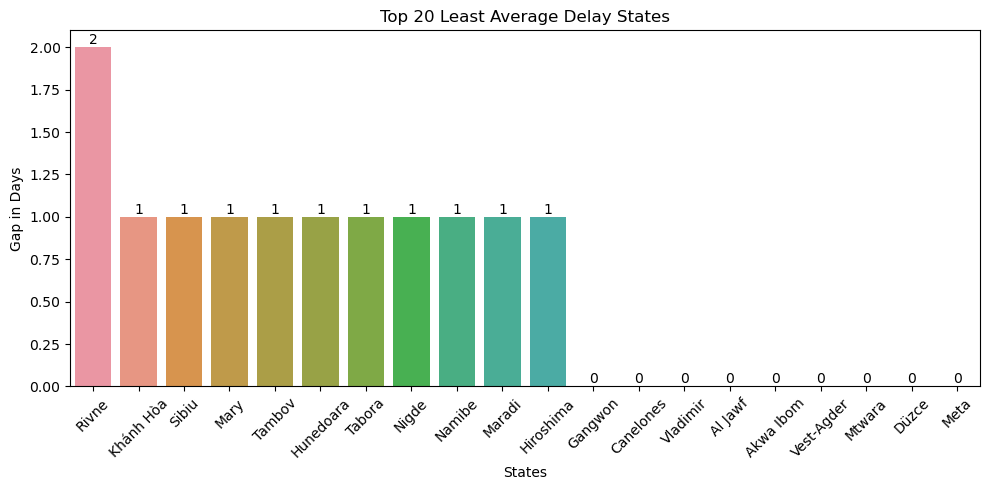

In [26]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=least_state_delay,x='state',y='delay')
plt.title('Top 20 Least Average Delay States')
plt.xlabel('States')
plt.ylabel('Gap in Days')
plt.xticks(rotation=45)
plt.tight_layout()
ShowLabels(ax)
plt.show()

### Comparing Delay in Most and Least Sales States

In [27]:
top_state=['England','California','Ile-de-France','New York','New South Wales']
for i in top_state:
    a=state_delay[state_delay['state']==i]
    print(a)


       state  delay
816  England    4.0
          state  delay
521  California    4.0
             state  delay
701  Ile-de-France    4.0
        state  delay
489  New York    4.0
               state  delay
488  New South Wales    4.0


* Top sales states have an average of 4 days in shipping delay

In [41]:
least_state=list(least_state_sale.loc[:,'state'])

In [42]:
for i in least_state:
    a=state_delay[state_delay['state']==i]
    print(a)


                  state  delay
154  Matabeleland North    5.0
        state  delay
775  Kabarole    4.0
     state  delay
63  Bitola    5.0
          state  delay
316  Manicaland    4.0
      state  delay
993  Pernik    3.0


* Shipping delay in Matabeleland North & Bitola is 5 Days

## 10) Top & Least 20 Highest Puchasing Customers

For identifying highest purchasing customers, we will use customer IDs.

In [61]:
id_sale=sale.groupby(['customer_id'],as_index=False)['sales'].sum()

In [65]:
id_sale.sort_values(by='sales',ascending=False,inplace=True)

In [67]:
id_sale.reset_index(drop=True,inplace=True)

In [68]:
id_sale

,customer_id,sales
0,TA-21385,35635
1,GT-14710,34434
2,TC-20980,34191
3,SM-20320,31105
4,BW-11110,30570
...,...,...
1585,MP-7470,56
1586,BD-1500,51
1587,RC-9825,37
1588,MG-7890,19


In [69]:
topid_sale=id_sale.head(20)

In [70]:
leastid_sale=id_sale.tail(20)

In [78]:
leastid_sale.sort_values(by='sales',ascending=True)
leastid_sale.reset_index(drop=True,inplace=True)

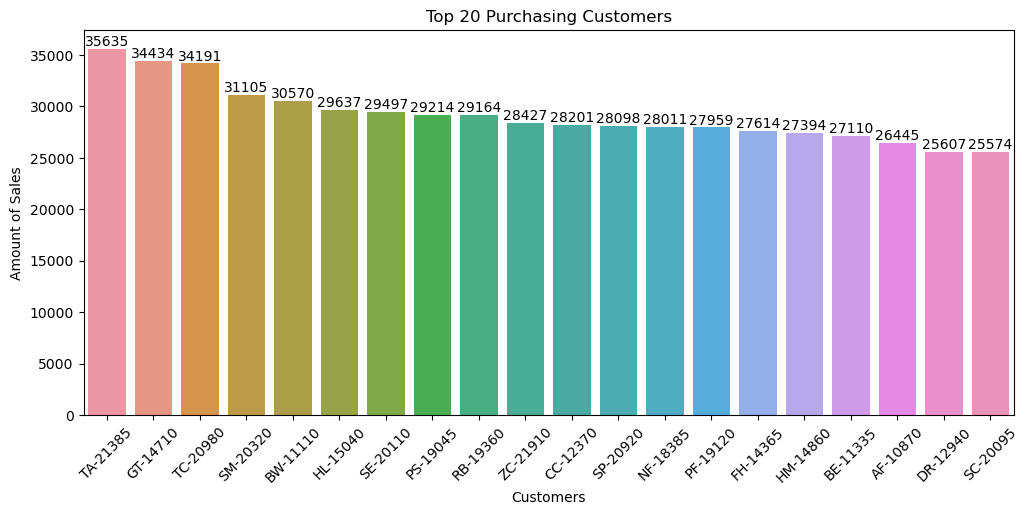

In [203]:
plt.figure(figsize=(12,5))

ax=sns.barplot(data=topid_sale,x='customer_id',y='sales')
plt.title('Top 20 Purchasing Customers')
plt.xlabel('Customers')
plt.xticks(rotation=45)
plt.ylabel('Amount of Sales')
ShowLabels(ax)
          

### Comments-

* We shall keep offering them good deals to increase the sales and loyalty of the customers.

## 11) Segment Wise Breakup of Customers

In [180]:
id_segment= sale.groupby(['customer_id','segment'],as_index=False)['sales'].sum()

In [181]:
id_segment.sort_values(by='sales',ascending=False,inplace=True)

In [182]:
id_segment.reset_index(drop=True,inplace=True)

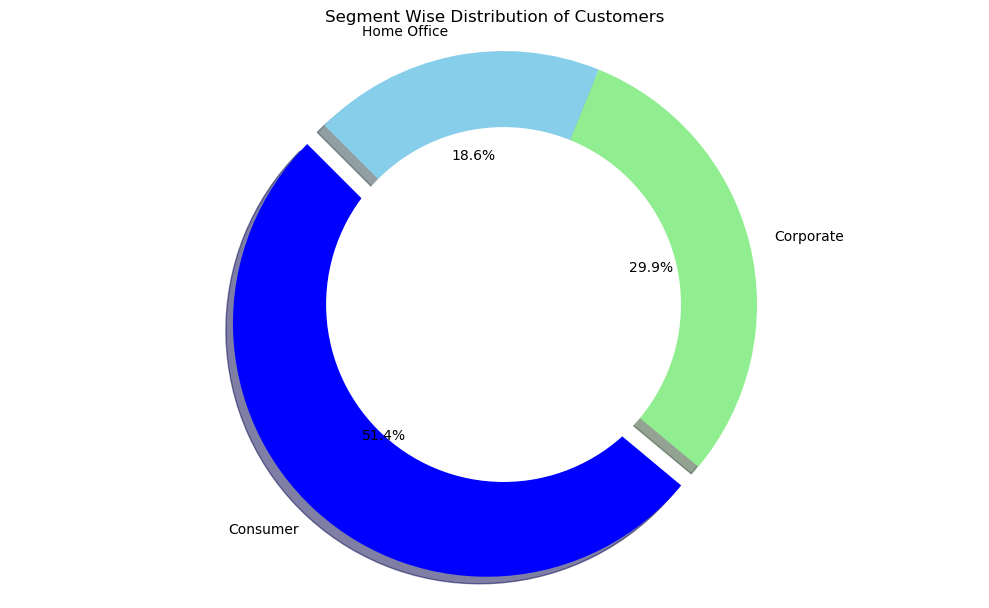

In [204]:
segment_counts = id_segment['segment'].value_counts()

plt.figure(figsize=(10, 6))
explode = (0.1, 0, 0)



plt.pie(segment_counts, explode=explode, labels=segment_counts.index,colors=['blue','lightgreen','skyblue'], autopct='%1.1f%%', shadow=True, startangle=135)

centre_circle = plt.Circle((0,0),.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  

plt.tight_layout()
plt.title('Segment Wise Distribution of Customers')
plt.show()

* Most of the buyers are from consumer,followed by Corporate and then by Home Office.  